# Column Descriptions

- Target
    - HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
    
- Continuous
    - BMI: Body Mass Index (BMI).
    - PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
    - MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
    - AgeCategory: Fourteen-level age category. (then calculated the mean)
    - SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
    
- Categorical:
    - Binary:
        - Stroke: (Ever told) (you had) a stroke?
        - DiffWalking: Do you have serious difficulty walking or climbing stairs?
        - Smoking: Have you smoked at least 100 cigarettes in your entire life?
        - AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
        - Asthma: (Ever told) (you had) asthma?
        - KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
        - SkinCancer: (Ever told) (you had) skin cancer?
        - PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
    - Other: 
        - Diabetic: (Ever told) (you had) diabetes?
        - Sex: Are you male or female?
        - Race: Imputed race/ethnicity value.
    - Ordered Categorical
        - GenHealth: Would you say that in general your health is...excellent, very good, etc.

In [222]:
from typing import List

#general
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
from dython.nominal import associations

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

In [223]:
def mean_of_age_category(row):
    if "older" in row:
        return 80
    else:
        return np.mean(list(map(int, row.split("-"))))


def data_preprocessing(data: pd.DataFrame, categorical_features: List[str], continuous_features: List[str], target_variable: str):

    df = data.copy()

    # protected variables
    sex = df["Sex"].values
    age = df["AgeCategory"].values
    race = df["Race"].values

    # target
    target = df[target_variable].values

    df_processed = df[categorical_features + continuous_features].copy() #.copy to avoid "SettingWithCopyWarning"
    df_processed["AgeCategory"] = df_processed["AgeCategory"].apply(mean_of_age_category)
    df_processed = pd.get_dummies(df_processed, prefix=None, prefix_sep='_',
                                  dummy_na=False, columns=categorical_features, drop_first=True)

    return df_processed, df, target, sex, age, race

In [224]:
train = pd.read_csv('data/heart_train.csv')

target_variable = "HeartDisease"

continuous_features = list(train._get_numeric_data().columns) + ["AgeCategory"]

categorical_features = list(set(train.columns) - set(continuous_features) - set([target_variable]))

train_processed, train_original, train_target, train_sex, train_age, train_race = data_preprocessing(
    train, categorical_features=categorical_features, continuous_features=continuous_features, target_variable=target_variable)

In [225]:
train_processed.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.319028,6.350816,12.020000,24.020000,27.320000,31.450000,94.850000
PhysicalHealth,3.377560,7.958264,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.918586,7.977471,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.340813,17.712776,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.098376,1.435420,1.000000,6.000000,7.000000,8.000000,24.000000


# Binary Feature Counts

Binary features counts:  ['Asthma', 'KidneyDisease', 'Smoking', 'Stroke', 'SkinCancer', 'AlcoholDrinking', 'PhysicalActivity', 'DiffWalking']


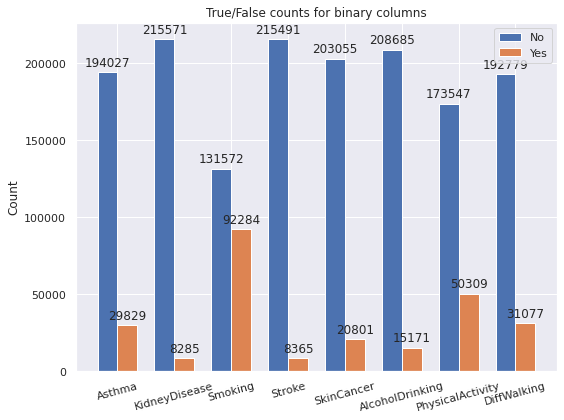

In [226]:
binary_features = ["Asthma", "KidneyDisease", "Smoking", "Stroke", "SkinCancer", "AlcoholDrinking", "PhysicalActivity", "DiffWalking"]
print("Binary features counts: ", binary_features)

fig, ax = plt.subplots(figsize=(8,6), sharey=False)
x = np.arange(len(binary_features))
width = 0.35

no = []
yes = []

for col in binary_features:
    n, y = train[col].value_counts().values
    no.append(n)
    yes.append(y)

    
rects1 = ax.bar(x - width/2, no, width, label='No')
rects2 = ax.bar(x + width/2, yes, width, label='Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('True/False counts for binary columns')
ax.set_xticks(x, binary_features, rotation=15)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

# Other Categorical Feature Counts

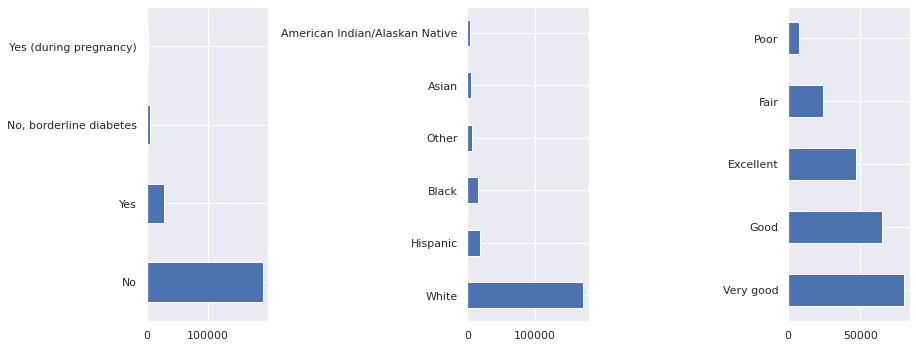

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

train["Diabetic"].value_counts().plot(kind="barh", ax=axs[0])
train["Race"].value_counts().plot(kind="barh", ax=axs[1])
train["GenHealth"].value_counts().plot(kind="barh", ax=axs[2])

plt.tight_layout()

# Continuous Counts

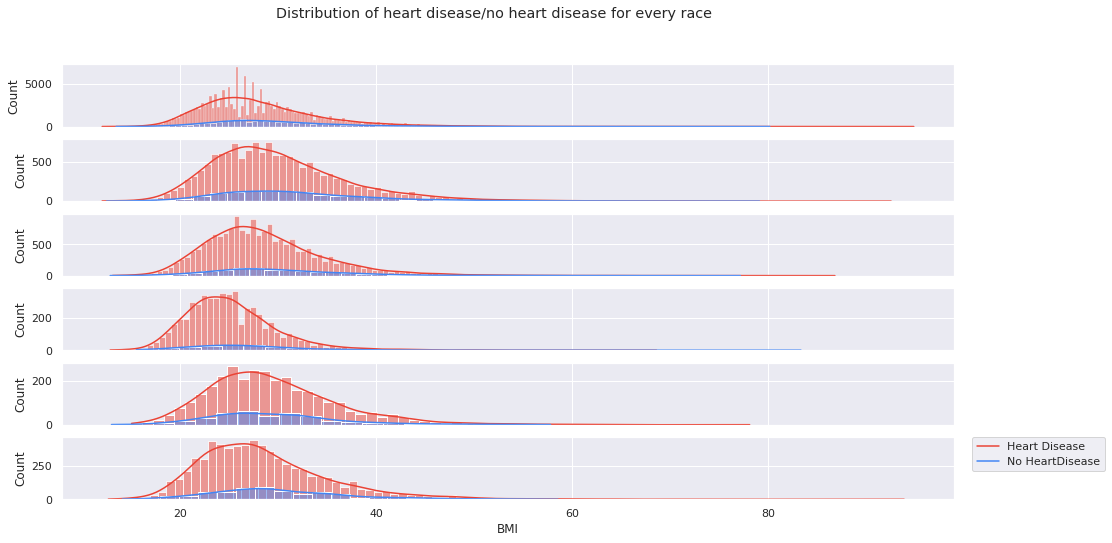

In [254]:
def histplot(n_hist, df, target, group, x_feature, colors=["#ea4335", '#4285f4']):
    # creating a figure composed of n_hist matplotlib.Axes objects
    f, ax_hist = plt.subplots(n_hist, sharex=True)
    groups = df[group].unique()
    
    f.suptitle('Distribution of heart disease/no heart disease for every race')
    
    for i in range(n_hist):
        for j, y in enumerate(df[target].unique()):
            sns.histplot(df[(df[target]==y) & (df[group]==groups[i])], x=x_feature, ax=ax_hist[i], kde=True, color=colors[j])
    
    plt.legend(loc=2, labels=['Heart Disease', 'No HeartDisease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
    plt.show()

histplot(6, train, "HeartDisease", "Race", "BMI")    
    

In [229]:
train_processed["HeartDisease"] = train["HeartDisease"].copy()

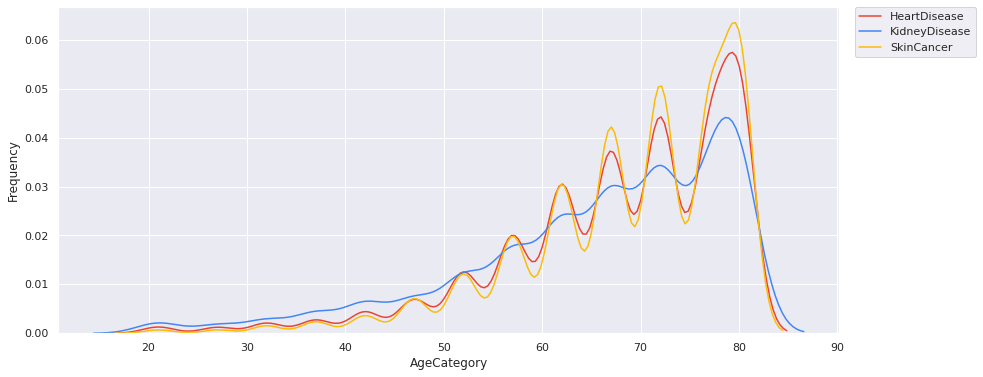

In [230]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(train_processed[train_processed["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(train_processed[train_processed["KidneyDisease_Yes"]==1]["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(train_processed[train_processed["SkinCancer_Yes"]==1]["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df_cat_dummies = pd.get_dummies(df_cat)

In [ ]:
df_cat_factorized = df_cat.apply(lambda x : pd.factorize(x)[0])

In [ ]:
df_cat["Race"].value_counts(), df_cat["Race"].value_counts(normalize=True)

In [ ]:
nominal.associations(df_cat_factorized, figsize=(10,10))

In [ ]:
df_cat_factorized[["Sex", "HeartDisease"]].value_counts(normalize=True)

In [ ]:
df_cat[["Race", "HeartDisease"]].value_counts(normalize=True).sort_index()

In [ ]:
df_cat.value_counts(["Race", "HeartDisease"], normalize=True)

In [ ]:
df_cat.groupby(["Race", "HeartDisease"]).size()§§

In [ ]:
df_cat[["Race", "HeartDisease"]].value_counts(normalize=True).sort_index()

In [ ]:
df_cat_factorized[["AgeCategory", "HeartDisease"]].value_counts(normalize=True)

In [ ]:
df_cat_factorized["Race"].value_counts(no)